<a href="https://colab.research.google.com/github/iashyam/Computation-QM/blob/main/1D_eiogenvalue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import numpy.linalg as lin

plt.style.use('seaborn-whitegrid')

%matplotlib inline

## Infinte Square Well 
\begin{equation}
V(x) = 
\begin{cases}
0 && if && 0<x<a \\
\infty && elsewhere
\end{cases}
\end{equation}

The natural length scale here is the width of well $a$.
And natural energy scale turn out to be $\dfrac{\hbar^2}{2ma^2}$

$$H_{i,j} = -\frac{1}{\Delta^2}(\delta_{i+1,j} + \delta_{i-1,j} - \delta_{1,j}) + V(\Delta i)*\delta_{i,j}$$

$y$  $\epsilon$ $[0,1]$

In [21]:
n = 400 #number of states we want to know
y = np.linspace(0,1,2*n)
Delta = y[1]-y[0]

In [3]:
def k(i,j):
    return 1 if i==j else 0

def V(x):
    return 0


In [4]:
def Hemiltonian(i,j):
    return (-1/Delta**2)*(k(i+1,j)+k(i-1,j)-2*k(i,j)) + V(Delta*i)*k(i,j)

In [5]:
H = np.array([[Hemiltonian(i,j) for i in range(-n,n)] for j in range(-n,n)])

In [6]:
eval, evac = lin.eig(H)

In [7]:
sort_eval = np.sort(eval)

In [18]:
idx = eval.argsort()
eval = eval[idx]
evac = evac[:,idx]
psi1 = evac[:,0]
psi2 = evac[:,2]
psi3 = evac[:,3]

potential = 0.1*np.array([V(Delta*i) for i in range(-n,n)])

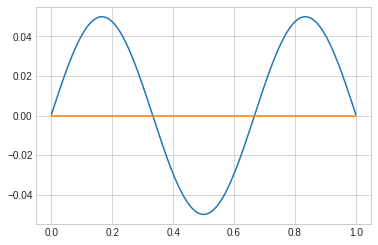

In [19]:
# plt.plot(y,psi1)
plt.plot(y,psi2)
# plt.plot(y,psi3)
plt.plot(y, potential)

In [20]:
print(eval[0])
print((math.pi)**2)


9.820366929289406
9.869604401089358
